In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [3]:
# 1. Load dataset
df = pd.read_csv("cleaned.xls")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,2,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0,1


In [4]:
cols_to_drop = ["Name", "Ticket", "Cabin"]  # adjust based on your file
df = df.drop(columns=[col for col in cols_to_drop if col in df.columns])

In [5]:
# 2. Define features (X) and target (y)
X = df.drop("Survived", axis=1)   # all features
y = df["Survived"]               # target column

In [6]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,3,1,22.0,1,0,7.2500,2,2
1,2,1,0,38.0,1,0,71.2833,0,2
2,3,3,0,26.0,0,0,7.9250,2,1
3,4,1,0,35.0,1,0,53.1000,2,2
4,5,3,1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,13.0000,2,1
887,888,1,0,19.0,0,0,30.0000,2,1
888,889,3,0,28.0,1,2,23.4500,2,4
889,890,1,1,26.0,0,0,30.0000,0,1


In [7]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
# 4. Build Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # you can tune max_depth
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

✅ Accuracy: 0.7932960893854749

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.84       110
           1       0.78      0.65      0.71        69

    accuracy                           0.79       179
   macro avg       0.79      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
 [[97 13]
 [24 45]]


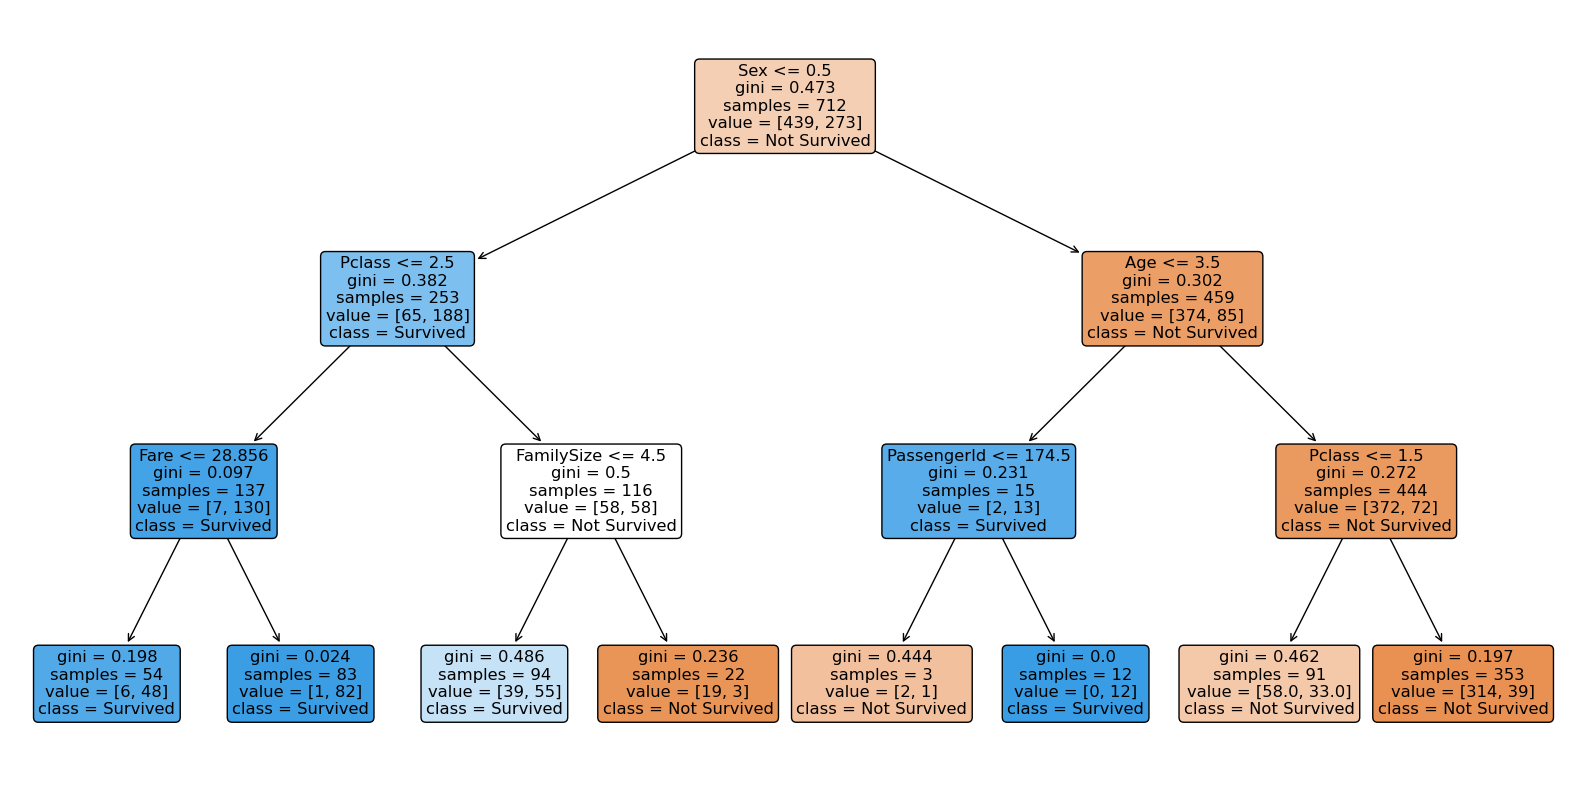

In [16]:
# 5. Predictions
y_pred = clf.predict(X_test)

# 6. Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7. Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=["Not Survived", "Survived"],
    filled=True,
    rounded=True
)
plt.show()